In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
df = pd.read_csv("C:/Users/selen/Clients-satisfaction-prediction/data/dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Binary Encoding
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Categorical variables to encode
cat_cols = df.select_dtypes(include='object').columns

# One-hot encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [5]:
# LabelEncoder
le = LabelEncoder()
df['target_encoded'] = le.fit_transform(df['Churn'])

# One-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Splitting X: explanatory variables and Y: the target
X = df.drop(['Churn', 'target_encoded'], axis=1)
y = df['target_encoded']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("Régression logistique")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))


Régression logistique
[[591 444]
 [ 52 322]]
              precision    recall  f1-score   support

           0       0.92      0.57      0.70      1035
           1       0.42      0.86      0.56       374

    accuracy                           0.65      1409
   macro avg       0.67      0.72      0.63      1409
weighted avg       0.79      0.65      0.67      1409

Accuracy: 0.6479772888573456


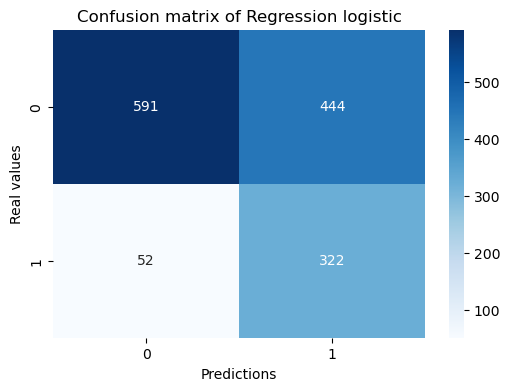

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions
y_pred_log = logreg.predict(X_test)

# Confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log)


plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion matrix of Regression logistic")
plt.xlabel("Predictions")
plt.ylabel("Real values")
plt.show()


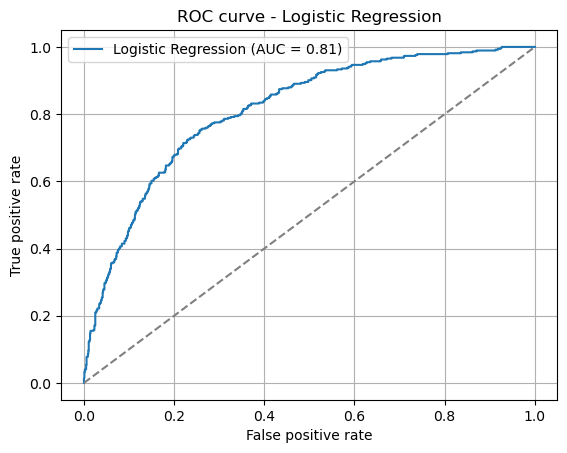

In [9]:
from sklearn.metrics import roc_curve, auc

y_score_log = logreg.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_score_log)
roc_auc_log = auc(fpr_log, tpr_log)

plt.figure()
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
svm = SVC(kernel='rbf')  # ou 'linear', 'poly', etc.
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM
[[1034    1]
 [ 367    7]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1035
           1       0.88      0.02      0.04       374

    accuracy                           0.74      1409
   macro avg       0.81      0.51      0.44      1409
weighted avg       0.77      0.74      0.63      1409

Accuracy: 0.7388218594748048


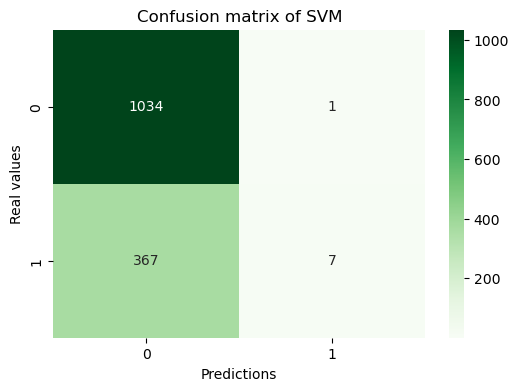

In [11]:
# Prédictions
y_pred_svm = svm.predict(X_test)

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)


plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion matrix of SVM")
plt.xlabel("Predictions")
plt.ylabel("Real values")
plt.show()


SVM
[[1034    1]
 [ 367    7]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1035
           1       0.88      0.02      0.04       374

    accuracy                           0.74      1409
   macro avg       0.81      0.51      0.44      1409
weighted avg       0.77      0.74      0.63      1409

Accuracy: 0.7388218594748048


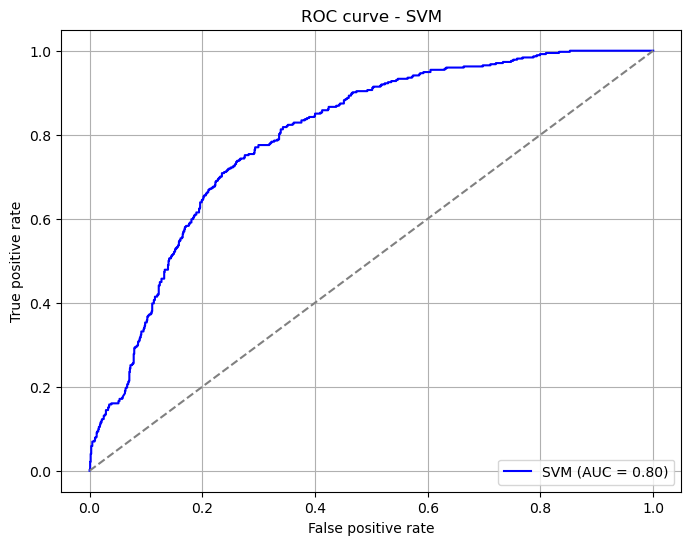

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Re-train SVM with probability enabled
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Prédictions
y_pred_svm = svm.predict(X_test)
y_score_svm = svm.predict_proba(X_test)[:, 1]  # Probabilité pour la classe positive

# Affichage des métriques
print("SVM")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score_svm)
roc_auc = auc(fpr, tpr)

# Tracer la courbe
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



In [13]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


c:\Users\selen\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:57:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.61      0.54      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Accuracy: 0.7863733144073811


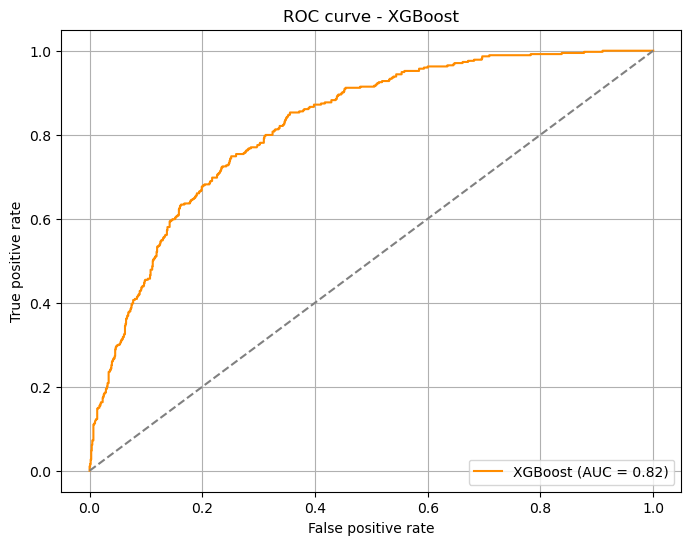

In [14]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Model trainning XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_score_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("XGBoost")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

# roc curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)


plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


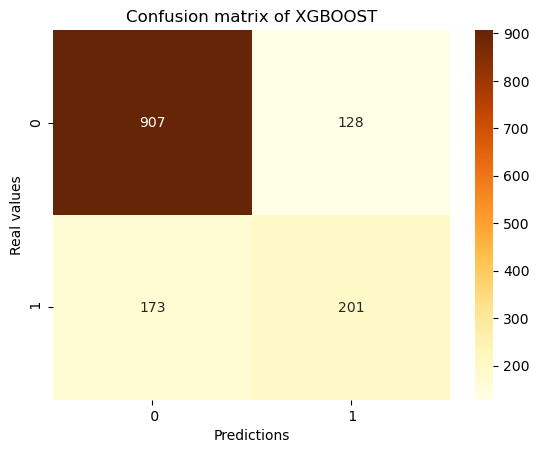

In [15]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
#Confusion matrix
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='YlOrBr', 
            xticklabels=[' 0', ' 1'],
            yticklabels=['0', ' 1'])
plt.title("Confusion matrix of XGBOOST")
plt.xlabel("Predictions")
plt.ylabel("Real values")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Logistic Regression
print("🔹 Logistic Regression")
lr = LogisticRegression(max_iter=1000)
scores_lr = cross_val_score(lr, X_scaled, y, cv=5, scoring='accuracy')
print(f"Accuracy: {scores_lr.mean():.3f} (+/- {scores_lr.std():.3f})")

# SVM (probability = False to reduce resulting time)
print("\n🔹 SVM")
svm = SVC(probability=False)  
scores_svm = cross_val_score(svm, X_scaled, y, cv=3, scoring='accuracy')  
print(f"Accuracy: {scores_svm.mean():.3f} (+/- {scores_svm.std():.3f})")

# XGBoost 
print("\n🔹 XGBoost")
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
scores_xgb = cross_val_score(xgb, X_scaled, y, cv=3, scoring='accuracy')  
print(f"Accuracy: {scores_xgb.mean():.3f} (+/- {scores_xgb.std():.3f})")


🔹 Logistic Regression
Accuracy: 0.648 (+/- 0.011)

🔹 SVM
Accuracy: 0.736 (+/- 0.000)

🔹 XGBoost


c:\Users\selen\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:35:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\selen\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:35:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\selen\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:35:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.781 (+/- 0.008)


## Analysis of results:
We will analyze all the parameters: accuracy, confusion matrix, and ROC curve, to compare the three algorithms and determine which one performs best in our case.

### Let’s start with accuracy: 
Although all three algorithms have an accuracy close to 0.7, we can see that XGBOOST comes out on top with 0.78.

### Moving on to the confusion matrix: 
According to the confusion matrix of logistic regression, we observe that this algorithm struggles to correctly classify true positives (1) and true negatives (0). XGBOOST performs better in classifying both classes, and finally, SVM is the one that distinguishes the class of true negatives (0) most effectively.
👉 We can also observe these results by analyzing the recall of each algorithm.

### Regarding the ROC curve:
Once again, XGBOOST leads with an AUC of 0.82 with a low standard deviation (0.008).

### Conclusion: 
After analyzing the accuracy, confusion matrix, ROC curve, recall, and standard deviation, we can conclude that XGBOOST is the most performant algorithm in our case. It achieves the highest accuracy (0.78), demonstrates better class separation in the confusion matrix, and has the best AUC score (0.82) on the ROC curve. Additionally, XGBOOST shows a low standard deviation, indicating that its performance is stable and consistent across different runs or data splits. 
 XGBOOST consistently outperforms the other two models across all key evaluation metrics.



